Autor: Joniel Bastos Barreto (PhD Student)

**Keras**: É uma API de rede neural de alto nível para treinamento de redes neurais. Pode ser executado em vários back-ends, como Tensorflow, Theano e CNTK.

Referência: [https://keras.io/api](https://keras.io/api)

## Introdução ao Keras

### Classe **Model**

Classe para representar grupos de camadas da sua rede
- Necessário especificar, ao menos, a entrada e a saı́da

No Keras, definimos o tipo de neurônio e o padrão de conectividade por meio da classe **Layer**.

In [ ]:
from keras.layers import Input, Dense

    Input(
      shape=None,
      batch_size=None,
      type=None,
      parse=None,
      batch_shape=None,
      name=None,
      tensor=None
    )

    Dense(
      units,
      activation=None,
      use_bias=True,
      kernel_initializer="glorot_uniform",
      bias_initializer="zeros",
      kernel_regularizer=None,
      bias_regularizer=None,
      activity_regularizer=None,
      kernel_constraint=None,
      bias_constraint=None,
      lora_rank=None,
      **kwargs
    )


In [ ]:
# Camada de entrada
inputs = Input(shape=(None, 4))
# Próximas camadas são conectadas utilizando notação funcional
hidden1 = Dense(10)(inputs)
hidden2 = Dense(10)(hidden1)
# Camada de saı́da
output = Dense(3)(hidden2)

#### Criar o modelo

In [ ]:
from keras.models import Model

In [ ]:
# Modelo completo: entrada e saı́da como argumentos
full_model = Model(inputs, output)
# Partes da rede podem ser referenciadas
# Útil para:
# - redes do tipo "encoder"-"decoder"
# - compartilhamento de pesos em redes mais complexas
only_hidden = Model(hidden1, hidden2)

#### Função de ativação

In [ ]:
from keras import activations
from keras.layers import Activation

In [ ]:
hidden1 = Dense(10)(inputs)
hidden1 = Activation(activations.relu)(hidden1)
# ou
hidden1 = Dense(10, activation = 'relu')
# ou
hidden1 = Dense(10, activation = activations.relu)

#### Dropout

In [ ]:
from keras.layers import Dropout

    Dropout(
      rate,
      noise_shape=None,
      seed=None,
      **kwargs
    )

#### Usando uma subclasse para criar o modelo

In [ ]:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.dense1 = Dense(10, activation = 'relu')
    self.dense2 = Dense(10, activation = 'relu')
    self.dense3 = Dense(3, activation = 'softmax')
    self.dropout = Dropout(0.5)

  # É possível utilizar o argumento "training (booleano)" para especificar algo apenas no treinamento
  def call(self, inputs, training=False):
    x = self.dense2(self.dense1(inputs))
    if training:
      x = self.dropout(x, training=training)
    return self.dense3(x)

model = MyModel()
model.build(input_shape=(None, 4))

In [ ]:
# Resumo do modelo
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             multiple                  50        
                                                                 
 dense_7 (Dense)             multiple                  110       
                                                                 
 dense_8 (Dense)             multiple                  33        
                                                                 
 dropout (Dropout)           multiple                  0 (unused)
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Classe **Sequential**
Grupo de layers organizadas sequencialmente.
- Resultado é um objeto que herda do tipo Model
- Método **add** é chamado sequencialmente para construir o modelo

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
# Adiciona as camadas sequencialmente
model.add(Dense(10))
model.add(Dense(10))
# Constrói o modelo indicando a entrada
model.build((None, 4))

In [ ]:
# O modelo éconstruı́do continuamente se indicado o formato da entrada
model = Sequential()
model.add(Dense(10, input_shape=(None, 4)))
model.add(Dense(10))
# ou
model = Sequential()
model.add(Input(shape=(4)))
model.add(Dense(10))
model.add(Dense(10))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                50        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
Total params: 160 (640.00 Byte)
Trainable params: 160 (640.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Visualizar o modelo

In [ ]:
from keras.utils import plot_model

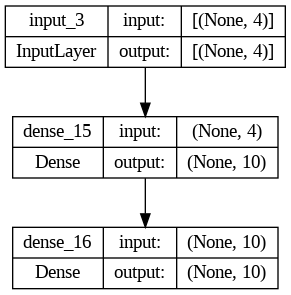

In [ ]:
plot_model(model, show_shapes=True)

Existem outros tipos de camadas de rede neural que podem ser construídas com o Keras, tais como:
- Localmente Conectadas
- Convolução
- Pooling
- Recorrentes
- Padronização
- entre outros.

Mais informações: https://keras.io/api/layers/

### Inicialização dos pesos
https://keras.io/api/layers/initializers/

- Normalmente distribuı́dos
  - RandomNormal
- Uniformemente distribuı́dos
  - RandomUniform
- Valores fixos
  - Zeros
  - Ones
  - Constant

In [ ]:
from keras import initializers

In [ ]:
layer = Dense(
    units = 10,
    kernel_initializer = initializers.RandomNormal(stddev=0.01),
    bias_initializer = initializers.Zeros()
    )

### Treinamento


    Model.fit(
        x=None,
        y=None,
        batch_size=None,
        epochs=1,
        verbose="auto",
        callbacks=None,
        validation_split=0.0,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
    )

Para utilizar amostras do dataset para validação do treinamento:
- `model.fit(validation_data=X_validacao)`, caso o conjunto de dados esteja dividido em:
  - X_treino
  - X_validacao
  - X_teste
- `model.fit(validation_split=0.3, shuffle=True)`, caso o conjunto de dados esteja dividido em:
  - X_treino
  - X_teste

O que devemos projetar quanto ao treinamento?
- Escolha da função de perda
- Escolha do método de otimização
- Escolha do critério de parada
- Cuidados quanto à generalização: técnicas regularização

#### Funções de perda
https://keras.io/api/losses/

Funções de perda probabilı́sticas
- Binary Cross-Entropy
- Categorical Cross-Entropy
- Divergência de Kullback-Leibler

Funções de perda para erro de regressão
- Erro quadrático médio
- Erro percentual médio
- Erro absoluto médio
- Erro logarı́tmico médio

In [ ]:
from keras.losses import BinaryCrossentropy

In [ ]:
loss = BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="sum_over_batch_size",
    name="binary_crossentropy",
)

#### Métodos de otimização
https://keras.io/api/optimizers/

- Stochastic Gradient Descent (SGD)
- RMSprop
- Adam


In [ ]:
from keras.optimizers import SGD

#### Taxa de aprendizado variável

- Decaimento exponencial
- Decaimento constante
- Decaimento polinomial
- Entre outros

In [ ]:
from keras.optimizers.schedules import ExponentialDecay

In [ ]:
lr_schedule = ExponentialDecay(
  initial_learning_rate = 1e-2,
  decay_steps = 10000,
  decay_rate = 0.9
  )

In [ ]:
optimizer = SGD(learning_rate=lr_schedule)

#### Critério de parada e métricas de desempenho
https://keras.io/api/metrics/

- Determinado número de épocas: `model.fit(epochs=100)`
- Baseado numa heurı́stica (evitando sub e sobre-ajuste)

In [ ]:
# AUC (área sob a curva) das curvas ROC (VP vs FP) ou PR (Precisão vs Revocação).
from keras.metrics import AUC

In [ ]:
metric = AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
)

#### Método **compile**
Configura o modelo para treinamento

In [ ]:
model.compile(
  optimizer = 'Adam',
  loss = 'mean_squared_error',
  metrics = ['MeanSquaredError', 'MeanAbsoluteError']
  )

#### Early Stopping
Interromper treinamento se a métrica parar de melhorar
- Pode ser utilizado a própria função de perda no conjunto de validação, quanto
qualquer outra métrica
- É necessário especificar um valor mı́nimo considerado da mudança e paciência do
método

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=10)

#### Visualizar o treinamento

In [ ]:
from plot_keras_history import plot_history

`plot_history(history)` utiliza o argumento **history** de `history = model.fit(...)`

### Teste

    Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)

## Exemplo de classificação com Keras usando o dataset Iris

### Carregar o dataset Iris

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris.data.shape

(150, 4)

### Visualizar o conjunto de dados

In [ ]:
import matplotlib.pyplot as plt

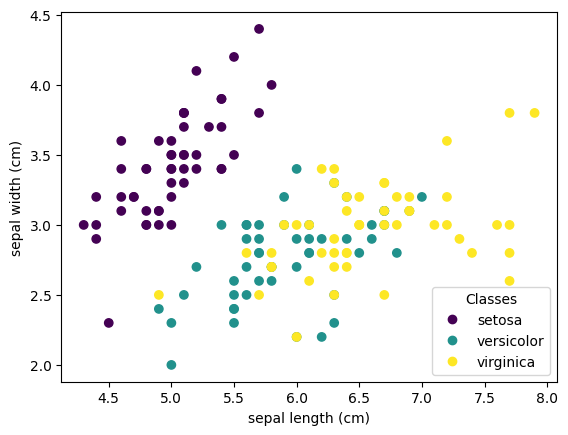

In [ ]:
# O dataset Iris possui 4 atributos, então para uma visualização 2D podemos escolher 2 deles
_, ax   = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### Divisão do conjunto em treino/teste e normalização dos conjuntos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

In [ ]:
scale = StandardScaler()
# Aprende a média e o desvio padrão a partir do conjunto de treinamento e o normaliza
X_train_scaled = scale.fit_transform(X_train)
# Normaliza o conjunto de teste a partir da média e desvio padrão do conjunto de treinamento
X_test_scaled  = scale.transform(X_test)

In [ ]:
# Keras exige que a saída tenha valores codificados one-hot
y_final = to_categorical(y_train)
y_real  = to_categorical(y_test)

In [ ]:
print(X_train_scaled.shape)
print(y_final.shape)
print(X_test_scaled.shape)
print(y_real.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


### Treinamento

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 4, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.3))

    model.add(Dense(3, activation = 'softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

iris_model = create_model()

In [ ]:
iris_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                50        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_20 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


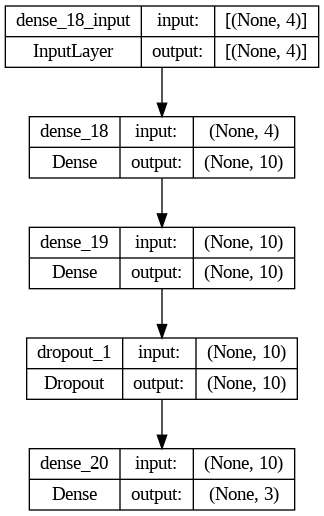

In [ ]:
plot_model(iris_model, show_shapes=True)

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=10)

iris_history = iris_model.fit(X_train_scaled, y_final, epochs=500, validation_split=0.2, callbacks=[callback])

Epoch 1/500
3/3 [==============================] - 4s 636ms/step - loss: 1.4328 - accuracy: 0.2604 - val_loss: 1.5479 - val_accuracy: 0.3333
Epoch 2/500
3/3 [==============================] - 0s 180ms/step - loss: 1.3944 - accuracy: 0.2917 - val_loss: 1.4902 - val_accuracy: 0.3333
Epoch 3/500
3/3 [==============================] - 0s 103ms/step - loss: 1.4514 - accuracy: 0.3021 - val_loss: 1.4349 - val_accuracy: 0.3333
Epoch 4/500
3/3 [==============================] - 0s 131ms/step - loss: 1.3225 - accuracy: 0.2917 - val_loss: 1.3815 - val_accuracy: 0.3333
Epoch 5/500
3/3 [==============================] - 0s 147ms/step - loss: 1.2886 - accuracy: 0.3438 - val_loss: 1.3298 - val_accuracy: 0.3333
Epoch 6/500
3/3 [==============================] - 0s 76ms/step - loss: 1.2282 - accuracy: 0.3333 - val_loss: 1.2805 - val_accuracy: 0.3333
Epoch 7/500
3/3 [==============================] - 0s 192ms/step - loss: 1.1505 - accuracy: 0.4062 - val_loss: 1.2322 - val_accuracy: 0.3333
Epoch 8/500
3/

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

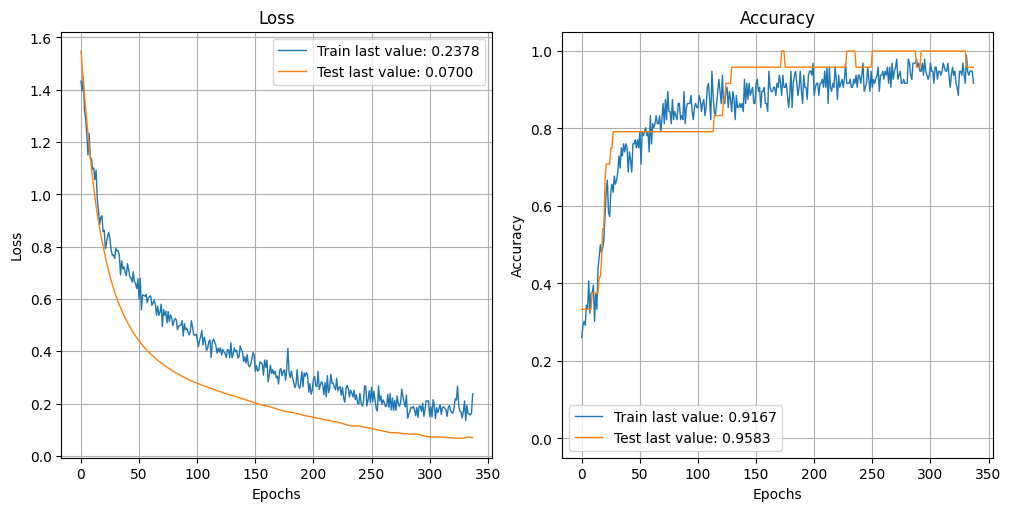

In [ ]:
plot_history(iris_history)

### Teste

É possível avaliar a performance do modelo com o conjunto de teste usando o

    Model.evaluate(
      x=None,
      y=None,
      batch_size=None,
      verbose="auto",
      sample_weight=None,
      steps=None,
      callbacks=None,
      return_dict=False,
      **kwargs
    )

que retorna o valor de perda e a métrica utilizada para o conjunto de teste.


In [ ]:
iris_model.evaluate(X_test_scaled, y_real)

1/1 [==============================] - 0s 37ms/step - loss: 0.1420 - accuracy: 0.9333


[0.14202646911144257, 0.9333333373069763]

Caso seja necessário fazer uma avaliação mais detalhada com outras métricas ou visualizar a matriz de confusão é possível utilizar o

    Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)
que retorna valores a saída do *softmax* e que pode ser usado para determinar a classe prevista para cada amostra.

In [ ]:
y_pred = iris_model.predict(X_test_scaled)

1/1 [==============================] - 0s 91ms/step


In [ ]:
y_pred

array([[9.99978840e-01, 1.45837994e-05, 6.54142741e-06],
       [9.99856234e-01, 1.13887640e-04, 3.00895135e-05],
       [8.39297627e-06, 1.47956843e-02, 9.85195816e-01],
       [9.99480069e-01, 4.49815532e-04, 7.00798482e-05],
       [9.99950111e-01, 3.60266022e-05, 1.38760151e-05],
       [5.87488117e-04, 9.09340829e-02, 9.08478439e-01],
       [9.98592854e-01, 1.23909838e-03, 1.67980877e-04],
       [7.51501966e-06, 1.48666631e-02, 9.85125661e-01],
       [3.60739978e-06, 3.66814737e-03, 9.96328294e-01],
       [9.99379337e-01, 5.23284369e-04, 9.74689974e-05],
       [9.99982059e-01, 1.19901451e-05, 5.78940308e-06],
       [9.99969423e-01, 2.18766399e-05, 8.54667996e-06],
       [9.99829769e-01, 1.36976261e-04, 3.32230738e-05],
       [9.99985516e-01, 9.37884306e-06, 5.05289017e-06],
       [1.87057391e-01, 6.84354067e-01, 1.28588572e-01],
       [6.67808950e-03, 7.47814655e-01, 2.45507166e-01],
       [2.40206093e-01, 7.45938420e-01, 1.38555309e-02],
       [3.15287486e-02, 9.08754

#### Matriz de confusão

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y = np.argmax(y_pred, axis=1)
y

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [ ]:
y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

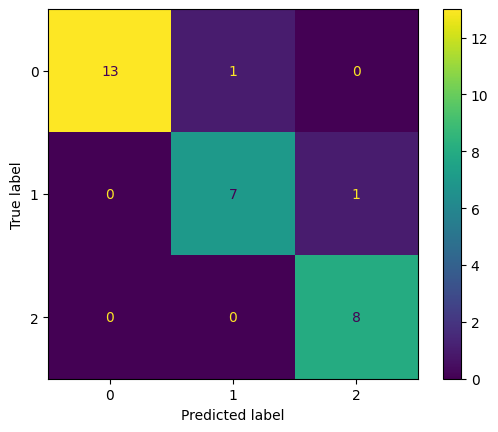

In [ ]:
cm = confusion_matrix(y_test, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr = classification_report(y_test, y, output_dict=True)
cr

{'0': {'precision': 1.0,
  'recall': 0.9285714285714286,
  'f1-score': 0.962962962962963,
  'support': 14},
 '1': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8},
 '2': {'precision': 0.8888888888888888,
  'recall': 1.0,
  'f1-score': 0.9411764705882353,
  'support': 8},
 'accuracy': 0.9333333333333333,
 'macro avg': {'precision': 0.9212962962962963,
  'recall': 0.9345238095238096,
  'f1-score': 0.9263798111837328,
  'support': 30},
 'weighted avg': {'precision': 0.937037037037037,
  'recall': 0.9333333333333333,
  'f1-score': 0.9336964415395789,
  'support': 30}}